In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
m=pd.read_csv("measurements.csv")

In [3]:
m.columns

Index(['ID', 'group', 'sex', 'birth_year', 'chol_init', 'chol_final',
       'trig_init', 'trig_final', 'weight_init', 'weight_final', 'weight_diff',
       'height_init', 'height_final', 'height_diff', 'armspan_init',
       'armspan_final', 'armspan_diff', 'arm_perimeter_init',
       'arm_periemter_final', 'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init', 'hip_perimeter_final',
       'hip_perimeter_diff', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init'],
      dtype='object')

In [4]:
st.ttest_rel(m.chol_init[:40], m.chol_final[:40])

TtestResult(statistic=15.44905555532676, pvalue=3.248017323055811e-18, df=39)

In [5]:
st.t.ppf(0.05,39)

-1.6848751194974

In [6]:
st.t.ppf(0.025,39)

-2.0226909117347285

In [7]:
descr = m.loc[:39,['chol_init', 'chol_final','trig_init', 'trig_final']].agg(['count', 'median', 'mean', 'min', 'max', 'std', 'var',
    lambda x: st.kurtosis(x.copy()), lambda y: st.skew(y.copy()), lambda z: st.shapiro(z)[0],  lambda z: st.shapiro(z)[1]])

In [8]:
descr.index = ['N', 'df', 'media', 'valoarea minima', 'valoarea maxima', 'deviatia standard', 'varianta', 'Kurtosis (boltire)',
       'Skewness (asimetrie)', 'statistica Shapiro', 'valoarea p Shapiro']

In [9]:
descr.loc['df'] = 39

In [10]:
#descr.loc['normalitate'] = ['Nu','Nu','Da','Da']

In [11]:
descr.round(2).to_csv('descr.csv')

In [12]:
descr

,chol_init,chol_final,trig_init,trig_final
N,40.000000,40.000000,40.000000,40.000000
df,39.000000,39.000000,39.000000,39.000000
media,178.925000,173.100000,82.875000,77.625000
valoarea minima,163.000000,157.000000,63.000000,68.000000
valoarea maxima,188.000000,183.000000,105.000000,97.000000
deviatia standard,7.532451,6.845549,8.376363,7.249005
varianta,56.737821,46.861538,70.163462,52.548077
Kurtosis (boltire),-0.304792,-0.296443,0.105762,-0.331084
Skewness (asimetrie),-0.738798,-0.659917,0.203124,0.504781
statistica Shapiro,0.904306,0.940077,0.971978,0.948868


In [13]:
tests = pd.DataFrame(columns=['statistica_t', 't_critic_unidirectional', 't_critic_bidirectional',
                              'valoare_p_bidir', 'valoare_p_unidir', 'alfa', 'levene_stat', 'levene_p',
                              'cohen_d', 'glass_delta', 'hedges_g', 'pearson_correlation'], index = ['colesterol', 'trigliceride'])
tests

,statistica_t,t_critic_unidirectional,t_critic_bidirectional,valoare_p_bidir,valoare_p_unidir,alfa,levene_stat,levene_p,cohen_d,glass_delta,hedges_g,pearson_correlation
colesterol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trigliceride,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
tests.t_critic_unidirectional = st.t.ppf(0.05,39)
tests.t_critic_bidirectional = st.t.ppf(0.025,39)
tests.alfa = 0.05

tests.loc['colesterol','statistica_t'] = '{:.2f}'.format(st.ttest_rel(m.chol_init[:40], m.chol_final[:40])[0])
tests.loc['colesterol','valoare_p_bidir'] = "{:e}".format(st.ttest_rel(m.chol_init[:40], m.chol_final[:40])[1])
tests.loc['colesterol','valoare_p_unidir'] = "{:e}".format(st.ttest_rel(m.chol_init[:40], m.chol_final[:40], alternative = 'greater')[1])
tests.loc['trigliceride','statistica_t'] = '{:.2f}'.format(st.ttest_rel(m.trig_init[:40], m.trig_final[:40])[0])
tests.loc['trigliceride','valoare_p_bidir'] = "{:e}".format(st.ttest_rel(m.trig_init[:40], m.trig_final[:40])[1])
tests.loc['trigliceride','valoare_p_unidir'] = "{:e}".format(st.ttest_rel(m.trig_init[:40], m.trig_final[:40], alternative = 'greater')[1])

tests.loc['colesterol','levene_stat'] = '{:.2f}'.format(st.levene(m.chol_init[:40], m.chol_final[:40])[0])
tests.loc['colesterol','levene_p'] = '{:.2f}'.format(st.levene(m.chol_init[:40], m.chol_final[:40])[1])
tests.loc['trigliceride','levene_stat'] = '{:.2f}'.format(st.levene(m.trig_init[:40], m.trig_final[:40])[0])
tests.loc['trigliceride','levene_p'] = '{:.2f}'.format(st.levene(m.trig_init[:40], m.trig_final[:40])[1])

tests.loc['colesterol', 'pearson_correlation'] = '{:.2f}'.format(m.loc[:39,['chol_init','chol_final']].corr().iloc[0,1])
tests.loc['trigliceride', 'pearson_correlation'] = '{:.2f}'.format(m.loc[:39,['trig_init','trig_final']].corr().iloc[0,1])

tests.T

,colesterol,trigliceride
statistica_t,15.45,9.39
t_critic_unidirectional,-1.684875,-1.684875
t_critic_bidirectional,-2.022691,-2.022691
valoare_p_bidir,3.248017e-18,1.468333e-11
valoare_p_unidir,1.624009e-18,7.341666e-12
alfa,0.05,0.05
levene_stat,0.25,0.63
levene_p,0.62,0.43
cohen_d,NaN,NaN
glass_delta,NaN,NaN


In [15]:
def cohen_glass_hedges(x,y):
    nx = len(x)
    ny = len(y)
    pstdnmr = (nx-1)*x.var(ddof=1) + (ny-1)*y.var(ddof=1)   # (n-1)(var1+var2)
    pstddnm = nx + ny - 2                                   # (n-1)*2
    pstd = (pstdnmr / pstddnm)**(0.5)
    cohen = (x.mean() - y.mean()) / pstd
    glass = (x.mean() - y.mean()) / x.std(ddof=1)
    hedges = cohen * (1 - 3/(4 * (nx+ny) - 9) )             # cohen * (1-3/(8*n-9))
    return (cohen, glass, hedges)
tests.loc['colesterol',['cohen_d', 'glass_delta', 'hedges_g']] = cohen_glass_hedges(m.chol_init[:40], m.chol_final[:40])
tests.loc['trigliceride',['cohen_d', 'glass_delta', 'hedges_g']] = cohen_glass_hedges(m.trig_init[:40], m.trig_final[:40])
tests

,statistica_t,t_critic_unidirectional,t_critic_bidirectional,valoare_p_bidir,valoare_p_unidir,alfa,levene_stat,levene_p,cohen_d,glass_delta,hedges_g,pearson_correlation
colesterol,15.45,-1.684875,-2.022691,3.248017e-18,1.624009e-18,0.05,0.25,0.62,0.809343,0.773321,0.801535,0.95
trigliceride,9.39,-1.684875,-2.022691,1.468333e-11,7.341666e-12,0.05,0.63,0.43,0.670242,0.626764,0.663777,0.91


In [16]:
tests.columns

Index(['statistica_t', 't_critic_unidirectional', 't_critic_bidirectional',
       'valoare_p_bidir', 'valoare_p_unidir', 'alfa', 'levene_stat',
       'levene_p', 'cohen_d', 'glass_delta', 'hedges_g',
       'pearson_correlation'],
      dtype='object')

In [17]:
tests.columns = ['statistica t', 't critic unidirectional', 't critic bidirectional',
       'valoare p bidirectionala', 'valoare p unidirectionala', 'prag de semnificatie', 'statistica Levene',
       'valoarea p Levene', 'Cohen d', 'Glass delta', 'Hedges g', 'corelatia Pearson']

In [18]:
tests.T.to_csv('tests.csv')

In [19]:
cholsn = m.loc[:39,['sex','chol_init','chol_final']].melt(id_vars='sex', value_vars=['chol_init','chol_final'], var_name='timp', value_name='colesterol')

In [20]:
cholsn.T

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
sex,f,m,f,f,m,m,m,f,m,f,...,m,m,m,m,f,m,m,m,m,f
timp,chol_init,chol_init,chol_init,chol_init,chol_init,chol_init,chol_init,chol_init,chol_init,chol_init,...,chol_final,chol_final,chol_final,chol_final,chol_final,chol_final,chol_final,chol_final,chol_final,chol_final
colesterol,183.0,185.0,185.0,188.0,188.0,175.0,174.0,178.0,182.0,178.0,...,177.0,167.0,169.0,168.0,168.0,182.0,175.0,178.0,161.0,181.0


In [21]:
trigsn = m.loc[:39,['sex','trig_init','trig_final']].melt(id_vars='sex', value_vars=['trig_init','trig_final'], var_name='timp', value_name='trigliceride')

In [22]:
trigsn.T

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
sex,f,m,f,f,m,m,m,f,m,f,...,m,m,m,m,f,m,m,m,m,f
timp,trig_init,trig_init,trig_init,trig_init,trig_init,trig_init,trig_init,trig_init,trig_init,trig_init,...,trig_final,trig_final,trig_final,trig_final,trig_final,trig_final,trig_final,trig_final,trig_final,trig_final
trigliceride,74.0,88.0,85.0,96.0,83.0,86.0,96.0,88.0,91.0,75.0,...,83.0,73.0,73.0,76.0,72.0,77.0,71.0,76.0,97.0,83.0


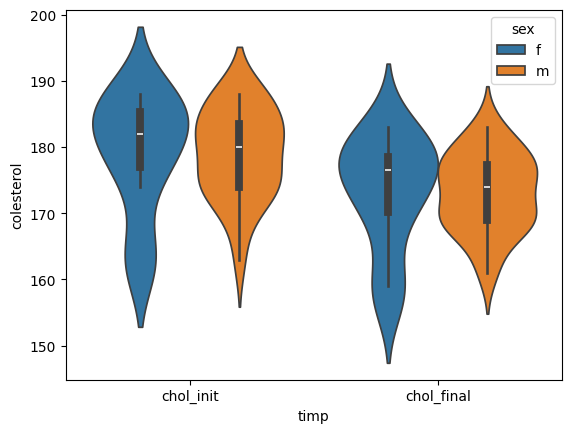

In [23]:
sns.violinplot(data=cholsn, x='timp', y='colesterol', hue='sex')
plt.savefig('violin-colesterol.pdf')

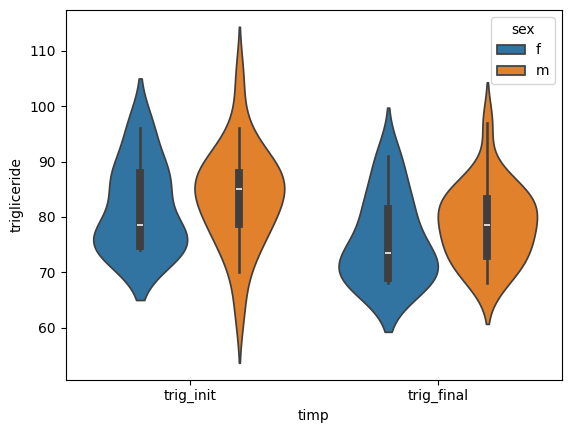

In [24]:
sns.violinplot(data=trigsn, x='timp', y='trigliceride', hue='sex')
plt.savefig('violin-trigliceride.pdf')

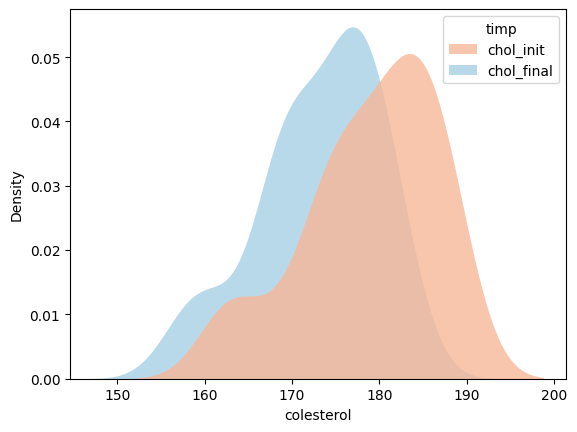

In [25]:
sns.kdeplot(
   data=cholsn, x="colesterol", hue="timp",
   fill=True, common_norm=False, palette="RdBu",
   alpha=.8, linewidth=0,
)
plt.savefig('kde-colesterol.pdf')

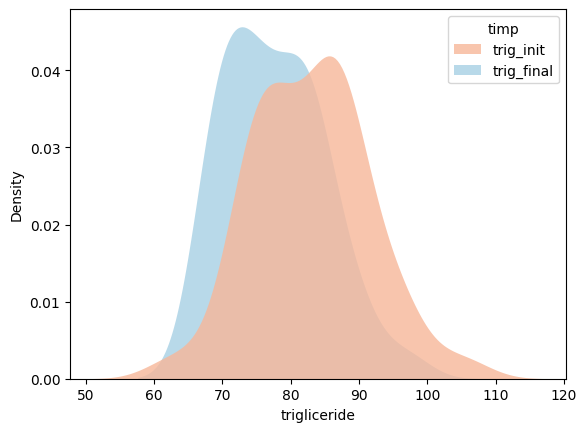

In [26]:
sns.kdeplot(
   data=trigsn, x="trigliceride", hue="timp",
   fill=True, common_norm=False, palette="RdBu",
   alpha=.8, linewidth=0,
)
plt.savefig('kde-trigliceride.pdf')

In [27]:
compare = m.loc[:39, ['chol_init', 'chol_final', 'trig_init', 'trig_final']].copy()
compare['chol_init_m']=m.groupby('sex').chol_init.get_group('m')
compare['chol_init_f']=m.groupby('sex').chol_init.get_group('f')
compare['chol_final_m']=m.groupby('sex').chol_final.get_group('m')
compare['chol_final_f']=m.groupby('sex').chol_final.get_group('f')
compare['trig_init_m']=m.groupby('sex').trig_init.get_group('m')
compare['trig_init_f']=m.groupby('sex').trig_init.get_group('f')
compare['trig_final_m']=m.groupby('sex').trig_final.get_group('m')
compare['trig_final_f']=m.groupby('sex').trig_final.get_group('f')
compare.head(3)

,chol_init,chol_final,trig_init,trig_final,chol_init_m,chol_init_f,chol_final_m,chol_final_f,trig_init_m,trig_init_f,trig_final_m,trig_final_f
0,183.0,177.0,74.0,68.0,NaN,183.0,NaN,177.0,NaN,74.0,NaN,68.0
1,185.0,179.0,88.0,81.0,185.0,NaN,179.0,NaN,88.0,NaN,81.0,NaN
2,185.0,180.0,85.0,74.0,NaN,185.0,NaN,180.0,NaN,85.0,NaN,74.0


In [28]:
'''compare.loc[:,['chol_init','chol_init_m','chol_init_f']].plot.kde()
compare.loc[:,['chol_final','chol_final_m','chol_final_f']].plot.kde()
compare.loc[:,['trig_init','trig_init_m','trig_init_f']].plot.kde()
compare.loc[:,['trig_final','trig_final_m','trig_final_f']].plot.kde()'''

"compare.loc[:,['chol_init','chol_init_m','chol_init_f']].plot.kde()\ncompare.loc[:,['chol_final','chol_final_m','chol_final_f']].plot.kde()\ncompare.loc[:,['trig_init','trig_init_m','trig_init_f']].plot.kde()\ncompare.loc[:,['trig_final','trig_final_m','trig_final_f']].plot.kde()"